# Simple Linear Regression

## Overview
Simple Linear Regression is a fundamental machine learning algorithm used to model the relationship between a single independent variable (predictor) and a dependent variable (target). The goal is to find the best-fitting straight line through the data points.

## Mathematical Concept
The equation of a line is represented as:
$$y = mx + c$$

Where:
- **y** = Predicted value (dependent variable)
- **x** = Input feature (independent variable)
- **m** = Slope of the line (regression coefficient)
- **c** = Y-intercept (bias term)

## Dataset Summary
In this project, we will analyze the relationship between:
- **Independent Variable (X):** Hours Studied
- **Dependent Variable (Y):** Marks obtained

The dataset contains 30 observations showing how the number of hours studied impacts the marks a student receives. We will use this data to build a linear regression model that can predict marks based on hours studied.

## Objectives
1. Load and explore the dataset
2. Calculate regression coefficients (slope and intercept)
3. Fit the linear regression model
4. Make predictions on new data
5. Evaluate model performance using R² score and other metrics
6. Visualize the regression line and data points

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('data.csv')
data

,Hours_Studied,Marks
0,1.0,42
1,2.0,50
2,3.0,55
3,4.0,63
4,5.0,70
5,6.0,75
6,7.0,81
7,8.0,88
8,9.0,92
9,10.0,96


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hours_Studied  20 non-null     float64
 1   Marks          20 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 452.0 bytes


## Data Preparation: 

### Splitting Features and Target Variable

- To build a linear regression model, we need to separate the data into:

### **X (Features/Independent Variable)**
- Contains the input feature(s) used to make predictions
- In our case: **Hours_Studied**
- This is what we use to predict the outcome

### **Y (Target/Dependent Variable)**
- Contains the output we want to predict
- In our case: **Marks**
- This is what we want to estimate based on X

In [72]:
X= data[['Hours_Studied']]
Y= data['Marks']

### Splitting Training and Testing Data

-  we will be using 80% of data for training and rest for testing

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print([X_train], [Y_train],[X_test], [Y_test])

[    Hours_Studied
8             9.0
5             6.0
11            0.5
3             4.0
18            6.5
16            9.5
13            4.5
2             3.0
9            10.0
19            1.5
4             5.0
12            7.2
7             8.0
10            3.5
14            5.5
6             7.0] [8     92
5     75
11    35
3     63
18    78
16    94
13    67
2     55
9     96
19    47
4     70
12    83
7     88
10    56
14    73
6     81
Name: Marks, dtype: int64] [    Hours_Studied
0             1.0
17            7.6
15            2.5
1             2.0] [0     42
17    85
15    51
1     50
Name: Marks, dtype: int64]


## Building Model

In [74]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [75]:
y_pred = regressor.predict(X_test)
print([Y_test],[y_pred])

[0     42
17    85
15    51
1     50
Name: Marks, dtype: int64] [array([42.75879152, 84.18411435, 52.17363762, 49.03535559])]


### Plotting to see Difference

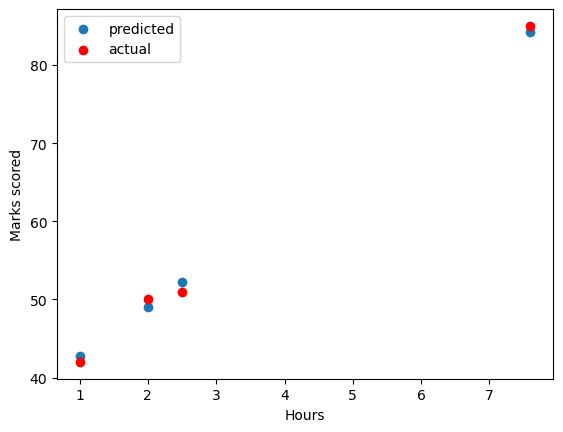

In [76]:
order = np.argsort(X_test.values.ravel())

X_sorted = X_test.values.ravel()[order]
Y_sorted = Y_test.values.ravel()[order]
y_pred_sorted = y_pred[order]
plt.scatter(X_sorted, y_pred_sorted, label="predicted")
plt.scatter(X_sorted, Y_sorted,label="actual", color='red')
plt.xlabel("Hours")
plt.ylabel("Marks scored")
plt.legend()
plt.show()

## Model Evaluation Metrics

To assess the performance of our linear regression model, we use several evaluation metrics:

- **Mean Squared Error (MSE):** Measures the average squared difference between actual and predicted values. Lower values indicate better fit.
- **Root Mean Squared Error (RMSE):** The square root of MSE, interpretable in the same units as the target variable.
- **R² Score (Coefficient of Determination):** Indicates the proportion of variance in the dependent variable explained by the model. Ranges from 0 to 1, with higher values indicating a better fit.

These metrics help us understand how well our model predicts marks based on hours studied.

### Mean Absolute Error (MAE)

Mean Absolute Error measures the average absolute difference between the actual and predicted values. It calculates the distance between each predicted value and the actual value, sums up these absolute differences, and then takes the average. Lower MAE values indicate better model performance.

Formula:
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$
where $y_i$ is the actual value and $\hat{y}_i$ is the predicted value.

In [77]:
mae=mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.9282398007525963


In [78]:
mse=mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.8873495176370109


In [79]:
r_squared = r2_score(Y_test, y_pred)
print("R-squared:", r_squared)

R-squared: 0.9967555776320401


## Model Performance Summary

Based on the calculated metrics:

- **Mean Absolute Error (MAE):** Indicates the average error in the same units as the target (Marks). Lower values mean the model's predictions are closer to the actual values.
- **Mean Squared Error (MSE):** Penalizes larger errors more than MAE. Lower values indicate better performance.
- **R² Score:** Shows how well the model explains the variance in the data. Values closer to 1 mean the model fits the data well.

If the MAE and MSE are low and the R² score is high (close to 1), the linear regression model is accurately predicting marks based on hours studied. If not, there may be room for improvement by using more data, feature engineering, or trying different algorithms.